### Inferential Statistics for Determining Important NBA Features

After acquiring my data from my two data sources, I will now apply inferential statistics to explore the data further and provide any interesting insights or trends from using various graphical and statistical techniques. Please note that the following data is the combined dataframe after various data mungings, computations, and feature engineerings. Please see Part 1 and 2 notebooks for graphical representations of these and also to see early initial EDA into the particular game data from rotoguru.com and player data from nba.com

In [119]:
# Import pandas and set df sizes
import pandas as pd
import numpy as np
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [120]:
# Load Final Combined DF from Data Storytelling Notebook
finaldf = pd.read_csv('/Users/kaizen/Data Science/Capstone/capstone_final_df.csv')
finaldf = finaldf.drop(['Unnamed: 0'], axis=1)
finaldf.head()

,PLAYER,Cluster,Opp,FDP,DvC,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,PLUSMINUS,2ndPTS,FBPs,PITP,OppPTSOFFTO,Opp2ndPTS,OppFBPs,OppPITP,BLKA,PFD,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TO Ratio,eFG%,TS%,USG%,PACE,PIE,%FGA2PT,%FGA3PT,%PTS2PT,%PTS2PTMR,%PTS3PT,%PTSFBPs,%PTSFT,%PTSOffTO,%PTSPITP,2FGM%AST,2FGM%UAST,3FGM%AST,3FGM%UAST,FGM%AST,FGM%UAST,PERIPHERAL
0,Giannis Antetokounmpo,3,chi,52.8,-9.784139,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1
1,Giannis Antetokounmpo,3,bkn,78.1,-12.757394,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1
2,Giannis Antetokounmpo,3,mia,54.0,-12.830732,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1
3,Giannis Antetokounmpo,3,was,63.0,1.462796,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1
4,Giannis Antetokounmpo,3,mia,31.7,-12.830732,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1


In [121]:
finaldf.shape

(12978, 72)

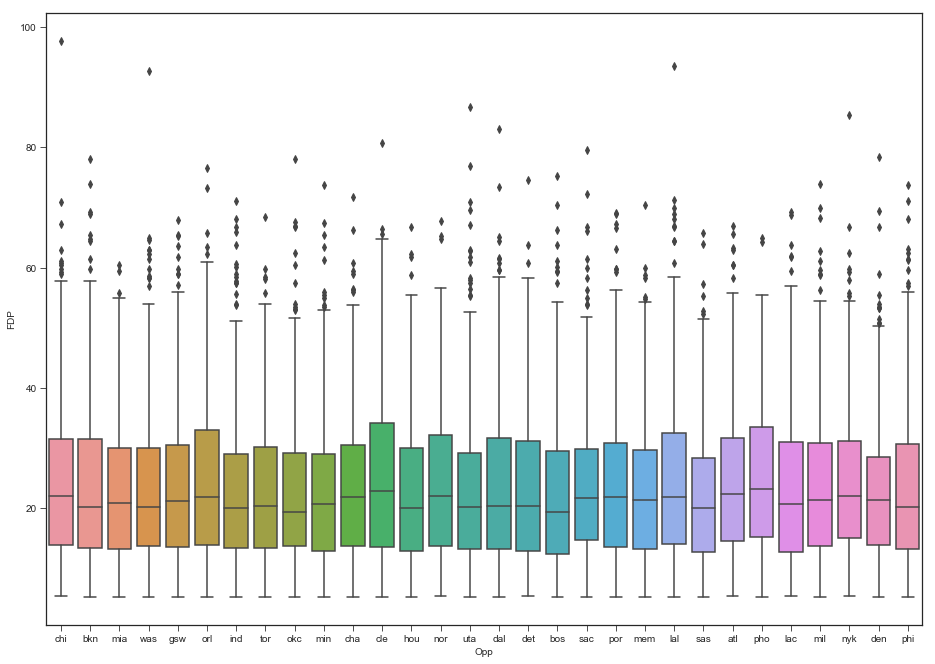

In [122]:
# Illustrate that the opponent column does influence FDP
import matplotlib.pyplot as plt
import seaborn as sns
fdp = finaldf['FDP']
opp = finaldf['Opp']
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(15.7, 11.27)
sns.boxplot(x=opp, y=fdp)
plt.show()

In [123]:
# Convert this categorical feature via one hot encoding labels for the opponents column 
one_hot = pd.get_dummies(finaldf['Opp'])

# Add our new one hot encoded data to original dataframe for more expressive machine learning
finaldf = finaldf.join(one_hot)

# Verify that the encoding is consistent 
# For instance, row 3 and 5 should have same onehotencoding data with Miami as the opponent
finaldf.head()

,PLAYER,Cluster,Opp,FDP,DvC,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,PLUSMINUS,2ndPTS,FBPs,PITP,OppPTSOFFTO,Opp2ndPTS,OppFBPs,OppPITP,BLKA,PFD,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TO Ratio,eFG%,TS%,USG%,PACE,PIE,%FGA2PT,%FGA3PT,%PTS2PT,%PTS2PTMR,%PTS3PT,%PTSFBPs,%PTSFT,%PTSOffTO,%PTSPITP,2FGM%AST,2FGM%UAST,3FGM%AST,3FGM%UAST,FGM%AST,FGM%UAST,PERIPHERAL,atl,bkn,bos,cha,chi,cle,dal,den,det,gsw,hou,ind,lac,lal,mem,mia,mil,min,nor,nyk,okc,orl,phi,pho,por,sac,sas,tor,uta,was
0,Giannis Antetokounmpo,3,chi,52.8,-9.784139,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Giannis Antetokounmpo,3,bkn,78.1,-12.757394,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Giannis Antetokounmpo,3,mia,54.0,-12.830732,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Giannis Antetokounmpo,3,was,63.0,1.462796,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Giannis Antetokounmpo,3,mia,31.7,-12.830732,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Graph the importance of each feature from our dataframe

R-square result:  0.5307985612369355


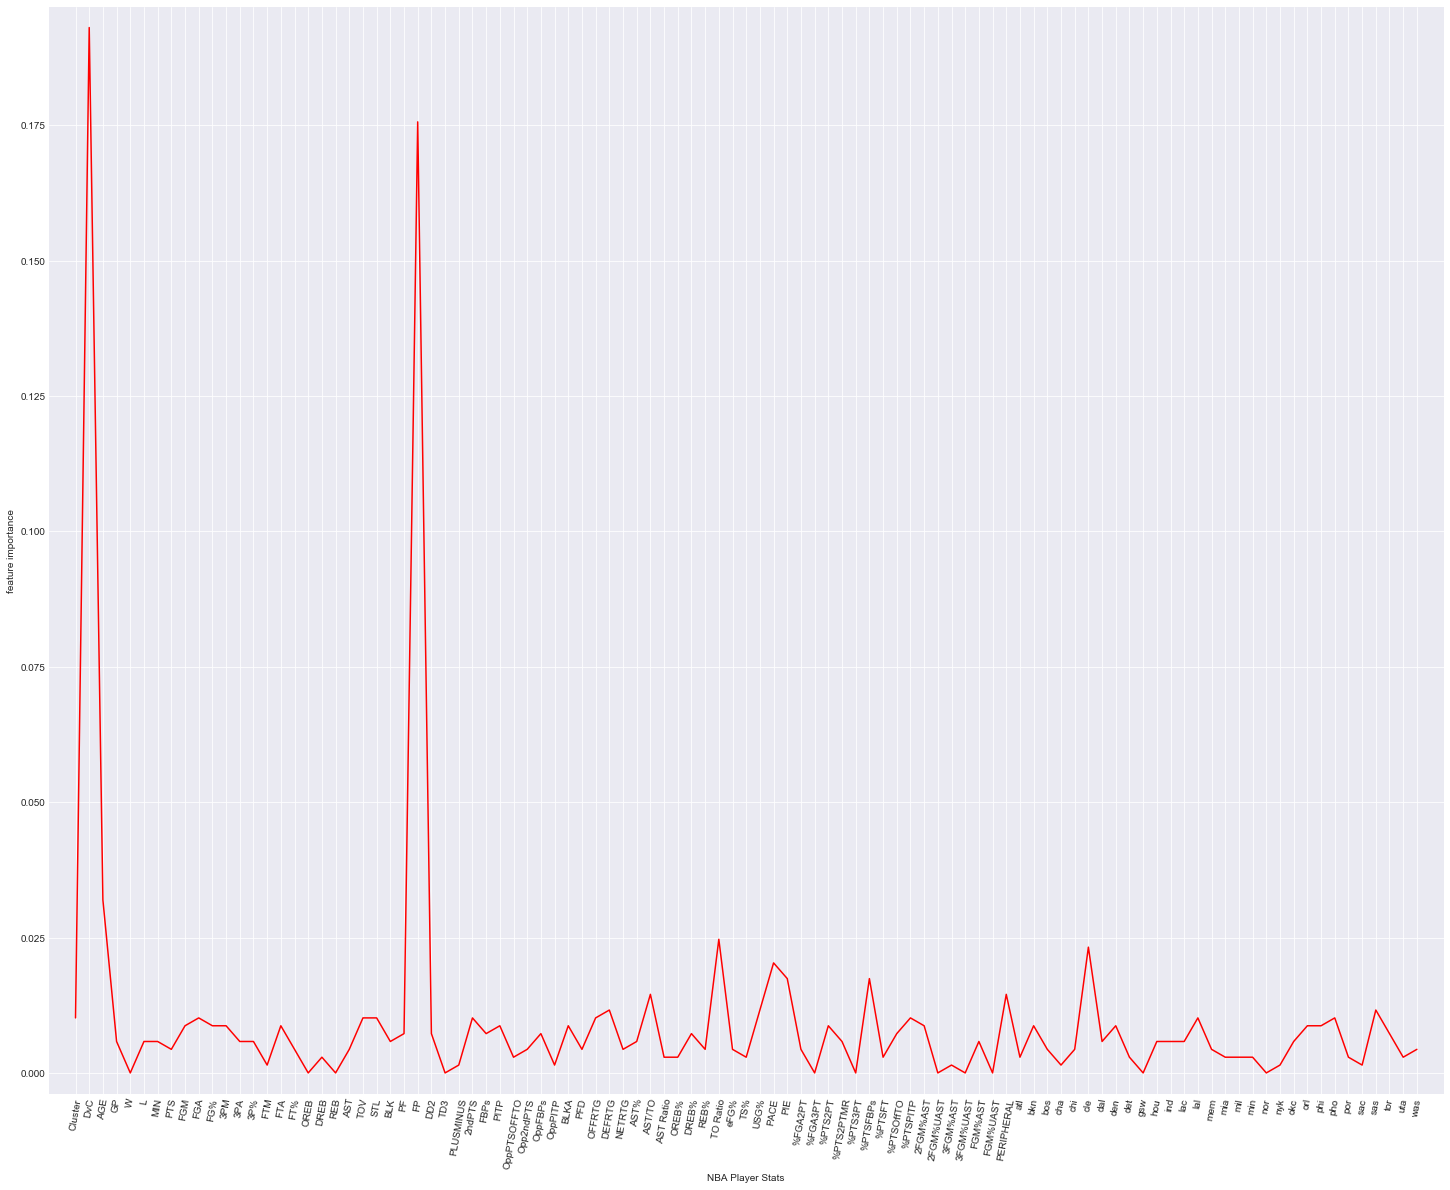

In [124]:
# Import necessary packages to scale data and perform Xgboost
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import xgboost as xgb
from sklearn import cross_validation, metrics 
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV 
from sklearn.metrics import r2_score
from xgboost.sklearn import XGBRegressor

# Turn our columns into our features array 
X2 = finaldf.drop(['FDP', 'PLAYER', 'Opp'], axis=1).values

# Turn FDP column into our Fanduel Fantasy Points target array 
y2 = finaldf['FDP'].values

# Scaling data using standard scaler method
# that removes the means and scales our features data to unit variance 
Xscale = preprocessing.StandardScaler().fit_transform(X2)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(Xscale, y2, test_size= 0.25, random_state= 42)

# A parameter grid for XGBoost
params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}

# Initialize XGB and GridSearch
xgb = XGBRegressor(nthread=8) 
grid = RandomizedSearchCV(xgb, params)
grid.fit(X_train, y_train)

# Print the r2 score
print('R-square result: ', r2_score(y_test, grid.best_estimator_.predict(X_test)))

# Graph our model's coefficients of feature importance 
xgb_coef = xgb.fit(X2, y2).feature_importances_
xgb_cols = finaldf.drop(['FDP', 'PLAYER', 'Opp'], axis=1).columns
sns.set_style("darkgrid")
plt.figure(figsize=(25,20))
plt.plot(range(len(xgb_cols)), xgb_coef, color='red')
plt.xticks(range(len(xgb_cols)), xgb_cols.values, rotation=80)
plt.margins(0.02)
plt.ylabel("feature importance")
plt.xlabel("NBA Player Stats")
plt.show()

In [125]:
# Create a DataFrame that shows the importance of each feature
capstone_df = pd.DataFrame(index=xgb_cols)
capstone_df['Feature_Importance'] = xgb_coef
capstone_df['Fea_Imp_2'] = capstone_df['Feature_Importance'] * 100

# Sort DataFrame in order of importance
cap_fi = capstone_df.sort_values('Feature_Importance', ascending=False)
cap_fi

,Feature_Importance,Fea_Imp_2
DvC,0.193033,19.303339
FP,0.175617,17.561684
AGE,0.031930,3.193033
TO Ratio,0.024673,2.467344
cle,0.023222,2.322206
PACE,0.020319,2.031930
PIE,0.017417,1.741655
%PTSFBPs,0.017417,1.741655
PERIPHERAL,0.014514,1.451379
AST/TO,0.014514,1.451379


In [126]:
# Ensure that the total of all feature importances is 100 
total_fi = cap_fi.Fea_Imp_2.sum()
print('total of all feature importances: ', total_fi)

total of all feature importances:  99.99999


In [127]:
finaldf.head(2)

,PLAYER,Cluster,Opp,FDP,DvC,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,PLUSMINUS,2ndPTS,FBPs,PITP,OppPTSOFFTO,Opp2ndPTS,OppFBPs,OppPITP,BLKA,PFD,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TO Ratio,eFG%,TS%,USG%,PACE,PIE,%FGA2PT,%FGA3PT,%PTS2PT,%PTS2PTMR,%PTS3PT,%PTSFBPs,%PTSFT,%PTSOffTO,%PTSPITP,2FGM%AST,2FGM%UAST,3FGM%AST,3FGM%UAST,FGM%AST,FGM%UAST,PERIPHERAL,atl,bkn,bos,cha,chi,cle,dal,den,det,gsw,hou,ind,lac,lal,mem,mia,mil,min,nor,nyk,okc,orl,phi,pho,por,sac,sas,tor,uta,was
0,Giannis Antetokounmpo,3,chi,52.8,-9.784139,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Giannis Antetokounmpo,3,bkn,78.1,-12.757394,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


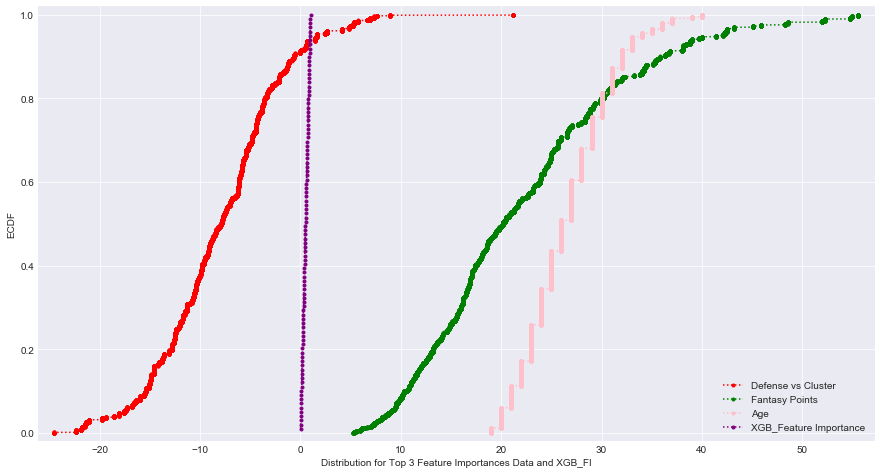

In [154]:
# Next, we will create a function that compute the empirical cumulative distribution function
# of our features to see how our data is distributed
def ecdf(data):
    '''Compute ECDF for a one-dimensional array of measurements'''
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for ECDF: y
    y = np.arange(1, n+1)/n
    return x, y

# To avoid clutter, we then plot the top 3 most important features and also our xgb feature importance results
xgb_fi = cap_fi['Feature_Importance'].values
x_dvc, y_dvc = ecdf(finaldf.DvC.values)
x_fp, y_fp = ecdf(finaldf.FP.values)
x_age, y_age = ecdf(finaldf.AGE.values)
x_xgbfi, x_xgbfi = ecdf(xgb_fi)

# Adjust margins and style
sns.set_style('darkgrid')

# Plot all ECDFs on the same plot
plt.figure(figsize=(15,8))
plt.plot(x_dvc, y_dvc, marker='.', linestyle=':', color='red')
plt.plot(x_fp, y_fp, marker='.', linestyle=':', color='green')
plt.plot(x_age, y_age, marker='.', linestyle=':', color='pink')
plt.plot(x_xgbfi, x_xgbfi, marker='.', linestyle=':', color='purple')
plt.margins(0.02)

# Annotate the plot
plt.legend(('Defense vs Cluster', 'Fantasy Points', 'Age', 'XGB_Feature Importance'), loc='lower right')
plt.xlabel('Distribution for Top 3 Feature Importances Data and XGB_FI')
plt.ylabel('ECDF')
       
plt.show()

In [ ]:
# Turn our columns into our features array 
X2 = finaldf.drop(['FDP', 'PLAYER', 'Opp'], axis=1).values

# Turn FDP column into our Fanduel Fantasy Points target array 
y2 = finaldf['FDP'].values

#### ECDF Insights

We see from the graph above that our DvC and FP features are the most varying in addition to being the most predictive for FDP. On the other hand, our XGB feature importance line is very steep and very skewed towards 0. 

### Hypothesis Testing

Armed with the above-mentioned EDA, we proceed to confirm our conclusions from our Part 1 Clustering Analysis, Part 2 Regression Analysis, and Part 3 Data Storytelling that DvC is the best predictor of NBA Fanduel daily fantasy points via hypothesis testing using bootstrap samples for linear regressions. 

In [201]:
import statsmodels.api as sm

In [202]:
# Perform Inferential Stats on DvC and Plot it vs FDP
xdvc = finaldf.DvC
ydvc = finaldf.FDP
model = sm.OLS(ydvc, xdvc).fit()
predictions = model.predict(xdvc) # make the predictions by the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FDP   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                 1.019e+04
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:52:08   Log-Likelihood:                -57232.
No. Observations:               12978   AIC:                         1.145e+05
Df Residuals:                   12977   BIC:                         1.145e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DvC           -1.7511      0.017   -100.953      0.000      -1.785      -1.717
==============================================================================
Omnibus:                      509.782   Durbin-Watson:                   1.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.354
Skew:                           0.477   Prob(JB):                    1.29e-127
Kurtosis:                       3.413   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

slope = 0.2646093812993496
intercept = 25.464708782358677


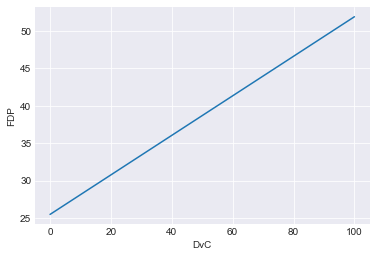

In [209]:
# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(xdvc, ydvc, 1)
# Print the results to the screen
print('slope =', a)
print('intercept =', b)
# Make theoretical line to plot
x = np.array([0,100])
y = a * x + b
# Add regression line to your plot
_ = plt.plot(x, y)
_ = plt.xlabel('DvC')
_ = plt.ylabel('FDP')

In [210]:
# Perform Inferential Stats on FP and Plot it vs FDP
xfp = finaldf.FP
yfp = finaldf.FDP
model = sm.OLS(yfp, xfp).fit()
predictions = model.predict(yfp) # make the predictions by the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FDP   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                 9.964e+04
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:56:38   Log-Likelihood:                -46972.
No. Observations:               12978   AIC:                         9.395e+04
Df Residuals:                   12977   BIC:                         9.395e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
FP             1.0295      0.003    315.651      0.000       1.023       1.036
==============================================================================
Omnibus:                      422.527   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              607.248
Skew:                           0.337   Prob(JB):                    1.37e-132
Kurtosis:                       3.817   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

slope = 0.9025382896929199
intercept = 3.3933221340840225


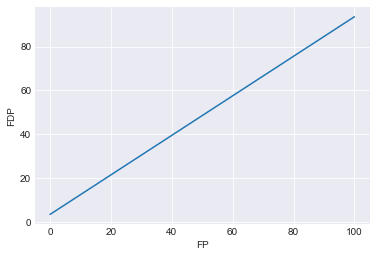

In [213]:
# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(xfp, yfp, 1)
# Print the results to the screen
print('slope =', a,)
print('intercept =', b,)
# Make theoretical line to plot
x = np.array([0,100])
y = a * x + b
# Add regression line to your plot
_ = plt.plot(x, y)
_ = plt.xlabel('FP')
_ = plt.ylabel('FDP')

### Inferential Statistics Analysis

From our operations above we see that when performing linear regression a player's seasonal fantasy points average provide a much higher correlation to FDP compare to our DvC feature. These findings greatly coincide with our elastic net and random forest graphs and operation in our regression analysis notebook.

However, when we perform Xgboost, we find that DvC slightly edge out FP. Statistical significance aside, our conclusion is to rely on our xgboost results due to its practical significance. The reason for this is because DvC changes often for every player if his cluster type change, or due to changes within the scope of the team from general managers trading decisions to coaching changes, or the simple fact that each team will have a clear DvC weakness that will provide more opportunities on a day-to-day basis. Whereas, with seasonal FP, even though it's true that a player who has a high seasonal average FP will tend to score higher FP, this provides a DFS player with less opportunities since the playing field usually know this and the DFS sites such as Fanduel will account for this seasonal stats in the salary pricing for each particular player.